# 課題-2) Plimpton 322 に記載された数表を生成する

In [19]:
import math
import itertools

In [27]:
def generate_p(i_max=2, j_max=2, k_max=2):
    l = []
    for i in range(i_max):
        for j in range(j_max):
            for k in range(k_max):
                l.append(2**i * 3**j * 5**k)
    return sorted(l)

generate_p()

[1, 2, 3, 5, 6, 10, 15, 30]

In [32]:
pp = itertools.product(generate_p(), generate_p())

list(pp);

In [30]:
pp = itertools.product(generate_p(), repeat=2)

list(pp);

In [26]:
pq = []
for p, q in itertools.product(generate_p(), repeat=2):
    if p > q and math.gcd(p,q) ==1:
        if p/q >= 9/5 and p/q <= 12/5:
            pq.append((p,q))

pq

[(2, 1)]

In [33]:
pq = []
for p, q in itertools.product(generate_p(4,3,2), repeat=2):
    if p > q and math.gcd(p,q) ==1:
        if p/q >= 9/5 and p/q <= 12/5:
            pq.append((p,q))

pq

[(2, 1), (9, 4), (9, 5), (12, 5), (15, 8), (20, 9)]

In [34]:
sorted(pq, reverse=True, key=lambda x: x[0]/x[1])

[(12, 5), (9, 4), (20, 9), (2, 1), (15, 8), (9, 5)]

課題-2) Plimton 322の数表を求める関数 `plimpton322()` を定義せよ:
* 引数 i_max, j_max, k_max を取り、デフォルト値はそれぞれ 2 とする
* `generate_p(i_max, j_max, k_max)` の直積の要素 `p, q` のうち、次の条件を満たすものを抜き出す
  - `p > q`
  - `math.gcd(p,q) == 1` (互いに素)
  - `p/q >= 9/5`
  - `p/q <= 12/5`
* 戻り値は、`p/q` をキーとして降順で返す

In [44]:
def plimpton322(i_max=2, j_max=2, k_max=2):
    ### BEGIN SOLUTION
    pq = []
    for p, q in itertools.product(generate_p(i_max,j_max,k_max), repeat=2):
        if p > q and math.gcd(p,q) ==1:
            if p/q >= 9/5 and p/q <= 12/5:
                pq.append((p,q))

    return sorted(pq, reverse=True, key=lambda x: x[0]/x[1])
    ### END SOLUTION

In [45]:
plimpton322()

[(2, 1)]

In [46]:
plimpton322(4,3,2)

[(12, 5), (9, 4), (20, 9), (2, 1), (15, 8), (9, 5)]

---
以下、採点用のセルにつき編集できない:

In [40]:
from nose.tools import assert_equal, assert_true

In [43]:
assert_equal(plimpton322(), [(2, 1)])

In [42]:
assert_equal(plimpton322(4,3,2), [(12, 5), (9, 4), (20, 9), (2, 1), (15, 8), (9, 5)])

$a=2pq$, $b=p^2-q^2$, $d=p^2+q^2$ は $a^2+b^2=d^2$ を満たす、ピタゴラスの三数である。

In [20]:
for p,q in sorted(pq, reverse=True, key=lambda p_q: p_q[0]/p_q[1]):
    a, b, d = 2*p*q, p**2-q**2, p**2+q**2
    print((d/a)**2,b,d)

1.983402777777778 119 169
1.9491585520886916 3367 4825
1.9188021267361113 4601 6649
1.8862479067215363 12709 18541
1.8741990279706793 67319 98569
1.815007716049383 65 97
1.7851929012345678 319 481
1.7199836762688614 2291 3541
1.6927094184027778 799 1249
1.6685522795835475 14129 22321
1.6426694444444445 481 769
1.5861225661103489 4961 8161
1.5625 3 5
1.5395333233905846 19039 32161
1.51921031640625 11529 19721
1.4894168402777779 1679 2929
1.450017361111111 161 289
1.430238820301783 1771 3229
1.3871604938271607 56 106


$${v_{1}}^2+1^2= \frac{b^2+a^2}{a^2} = \frac{d^2}{a^2} = {v_{4}}^2$$

$$c = \frac{p^2-q^2}{pq} = \frac{p}{q}-\frac{q}{p}$$

|#1 |#2 |#3 |
|:-:|:-:|:-:|
|$$\left(\frac{d}{a}\right)^2$$|$$b$$      |$$d$$      |
|$$\frac{1}{4}\left(\frac{p}{q}+\frac{q}{p}\right)^2$$|$$p^2-q^2$$|$$p^2+q^2$$|
|$$1+{v_{1}}^2 = {v_{4}}^2$$|$$a\cdot v_{1}$$|$$a\cdot v_{4}$$|
|$$1+\left(\frac{c}{2}\right)^2$$|$$\frac{a}{2}\left(x-\frac{1}{x}\right)$$|$$\frac{a}{2}\left(x+\frac{1}{x}\right)$$|

|.  |.  |.  |#1 |.  |#2 |#3 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$$\frac{d+b}{a}$$|$$\frac{d-b}{a}$$|$$2 \frac{b}{a}$$|$$\left(\frac{d}{a}\right)^2$$|$$a$$|$$b$$      |$$d$$      |
|$$\frac{p}{q}$$|$$\frac{q}{p}$$|$$\frac{p}{q}-\frac{q}{p}$$|$$\frac{1}{4}\left(\frac{p}{q}+\frac{q}{p}\right)^2$$|$$2pq$$|$$p^2-q^2$$|$$p^2+q^2$$|
|$$v_{4}+v_{1}$$|$$v_{4}-v_{1}$$|$$2\cdot v_{1}$$|$$1+{v_{1}}^2={v_{4}}^2$$|$$a$$|$$a\cdot v_{1}$$|$$a\cdot v_{4}$$|
|$$x$$|$$\frac{1}{x}$$|$$c=x-\frac{1}{x}$$|$$1+\left(\frac{c}{2}\right)^2$$|$$a$$|$$\frac{a}{2}\left(x-\frac{1}{x}\right)$$|$$\frac{a}{2}\left(x+\frac{1}{x}\right)$$|

In [346]:
for p,q in sorted(pq, reverse=True, key=lambda p_q: p_q[0]/p_q[1]):
    a, b, d = 2*p*q, p**2-q**2, p**2+q**2 # a**2+b**2 == d**2
    v4 = (d/a)
    v3 = (d/a)**2 # #1
    v1 = math.sqrt(v3-1) # = c/2
    x = v4+v1 # x**2 + 1 == (1/x)**2
    print(v1*2, (p**2-q**2)/(p*q), p/q-q/p)
    #print(v4**2,b,d)
    #print(1/4*(p/q+q/p)**2, p**2-q**2, p**2+q**2)
    #print(v3,b/a,d/a)
    #print(v3, a*v1,a*v4)
    #print(Fraction(p,q), d/a+b/a, d/a-b/a, Fraction(q,p)) # = p/q, q/p
    #print(v3, v4**2, v4)
    #print(v4, Fraction(d, a), d/a)
    #print(v1, b, Fraction(b,a), b/a)
    #
    #print((d+b),(d-b), v1*2*a)
    #print(x,(d+b)/a,(d-b)/a, v1*2)
    #
    #print(d/a+b/a, 1/(d/a+b/a), d/a-b/a) # x=v4+v1, 1/x=v4-v1
    #print(d/a+b/a - (d/a-b/a), v1*2)
    #print(v4**2, v1**2)
    #
    #print(v3-1, v1)

1.9833333333333336 1.9833333333333334 1.9833333333333332
1.9484953703703702 1.9484953703703705 1.9484953703703702
1.9170833333333335 1.9170833333333333 1.9170833333333333
1.8828148148148147 1.8828148148148147 1.882814814814815
1.8699722222222226 1.8699722222222221 1.8699722222222221
1.8055555555555558 1.8055555555555556 1.8055555555555556
1.7722222222222221 1.7722222222222221 1.7722222222222224
1.697037037037037 1.6970370370370371 1.6970370370370371
1.6645833333333333 1.6645833333333333 1.6645833333333333
1.6353009259259257 1.635300925925926 1.635300925925926
1.6033333333333335 1.6033333333333333 1.6033333333333335
1.5311728395061726 1.5311728395061728 1.5311728395061728
1.5 1.5 1.5
1.4690586419753087 1.4690586419753087 1.4690586419753084
1.441125 1.441125 1.441125
1.399166666666667 1.3991666666666667 1.3991666666666664
1.3416666666666663 1.3416666666666666 1.3416666666666668
1.3118518518518516 1.3118518518518518 1.3118518518518518
1.2444444444444447 1.2444444444444445 1.24444444444444

$$
  \begin{align}
    (a-b)^2+4\frac{ab}{2} &= d^2 \\
    a^2 + b^2 & = d^2
  \end{align}
$$

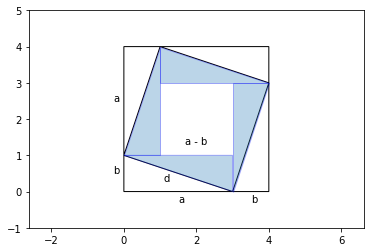

In [75]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

p00 = Polygon([(0,0), (3,0), (0,1), ], fill=False)
p01 = Polygon([(3,0), (4,0), (4,3), ], fill=False)
p02 = Polygon([(4,3), (4,4), (1,4), ], fill=False)
p03 = Polygon([(1,4), (0,4), (0,1), ], fill=False)

p10 = Polygon([(3,1), (3,0), (0,1), ], fill=True, alpha=0.3, edgecolor='b')
p11 = Polygon([(3,0), (3,3), (4,3), ], fill=True, alpha=0.3, edgecolor='b')
p12 = Polygon([(4,3), (1,3), (1,4), ], fill=True, alpha=0.3, edgecolor='b')
p13 = Polygon([(1,4), (1,1), (0,1), ], fill=True, alpha=0.3, edgecolor='b')

fig, ax = plt.subplots(1,1)

ax.add_patch(p00)
ax.add_patch(p01)
ax.add_patch(p02)
ax.add_patch(p03)
ax.add_patch(p10)
ax.add_patch(p11)
ax.add_patch(p12)
ax.add_patch(p13)
ax.axis('equal')
ax.set(xlim=(0,4),ylim=(-1,5))

plt.text(1.7,1.3,'a - b')
plt.text(1.1,0.3,'d')
plt.text(1.5,-0.3,'a')
plt.text(3.5,-0.3,'b')
plt.text(-0.3,2.5,'a')
plt.text(-0.3,0.5,'b')
plt.show()